In [1]:
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

In [2]:
def gaussian(x, mu, sig):
    return 1/(sig * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sig**2))

training_set=pandas.read_table("h_tra.txt", names=['X','Y1','Y2'],
                               dtype={'X': float,'Y1':int,'Y2':int},skipinitialspace=True,sep=' ')
test_set=pandas.read_table("h_tes.txt", names=['X','Y1','Y2'],
                               dtype={'X': float,'Y1':int,'Y2':int},skipinitialspace=True,sep=' ')

c1=training_set[(training_set['Y1']==1) &(training_set['Y2']==0)]
c2=training_set[(training_set['Y1']==0) &(training_set['Y2']==1)]
test_c1=training_set[(test_set['Y1']==1) &(test_set['Y2']==0)]
test_c2=training_set[(test_set['Y1']==0) &(test_set['Y2']==1)]

C1, mean:  24.182818199999996 std dev:  5.35976009937869
C2, mean:  49.4995426 std dev:  9.22059431619247


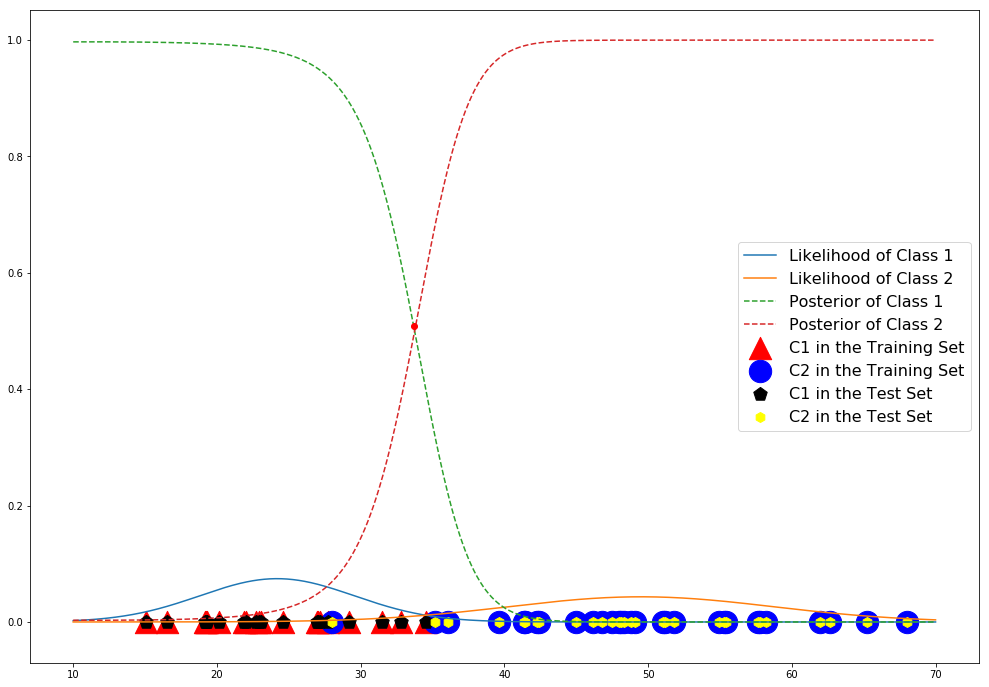

In [3]:
prior_c1=c1.size/training_set.size
prior_c2=c2.size/training_set.size

#calculate likelihoods
m1=c1.X.mean()
s1=c1.X.std()
m2=c2.X.mean()
s2=c2.X.std()
print("C1, mean: ",m1,"std dev: ",s1)
print("C2, mean: ",m2,"std dev: ",s2)
#plot likelihoods
axis=np.linspace(10, 70, 900)
c1_likelihood=gaussian(axis, m1, s1)
c2_likelihood=gaussian(axis, m2, s2)

#calculate posteriors
c1_posterior=(c1_likelihood*prior_c1)/(c1_likelihood*prior_c1+c2_likelihood*prior_c2)
c2_posterior=(c2_likelihood*prior_c2)/(c1_likelihood*prior_c1+c2_likelihood*prior_c2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.plot(axis,c1_likelihood,label='Likelihood of Class 1')
plt.plot(axis,c2_likelihood,label='Likelihood of Class 2')
plt.plot(axis,c1_posterior,linestyle='--',label='Posterior of Class 1')
plt.plot(axis,c2_posterior,linestyle='--',label='Posterior of Class 2')

idx = np.argwhere(np.diff(np.sign(c1_posterior - c2_posterior)) != 0).reshape(-1) + 0
plt.plot(axis[idx], c1_posterior[idx], 'ro')
plt.scatter(c1.X, np.zeros(len(c1)),s=500, marker='^',label='C1 in the Training Set',color='red')
plt.scatter(c2.X, np.zeros(len(c2)),s=500, marker='o',label='C2 in the Training Set',color='blue')
plt.scatter(test_c1.X, np.zeros(len(test_c1)), s=200, marker=(5, 0),label='C1 in the Test Set',color='black')
plt.scatter(test_c2.X, np.zeros(len(test_c2)), s=100, marker=(6, 0),label='C2 in the Test Set',color='yellow')
plt.legend(prop={'size': 16},fontsize=8)
plt.show()

In [4]:
def discriminant_function(s1,m1,s2,m2,x):
    c1_likelihood=gaussian(x, m1, s1)
    c2_likelihood=gaussian(x, m2, s2)
    c1_posterior=(c1_likelihood*prior_c1)/(c1_likelihood*prior_c1+c2_likelihood*prior_c2)
    c2_posterior=(c2_likelihood*prior_c2)/(c1_likelihood*prior_c1+c2_likelihood*prior_c2)
    return 1 if c2_posterior>c1_posterior else 0


#Design of confusion matrix
##############Truth####
#############C1###C2##
########C1  0,1  0,1
#Decision
########C2  1,0  1,1
conf_matrix=np.zeros((2,2),dtype=np.int32)
for idx,row in test_set.iterrows():
    decision=discriminant_function(s1,m1,s2,m2,row.X)
    ##Class 1 = 1-0
    ##Class 2 = 0-1
    if decision==1 and row.Y2==1: ##Class 2 Correct Classification 
        #1,1 on the confusion matrix
        conf_matrix[1,1]+=1
    elif decision==0 and row.Y2==0: ##Class 1 Correct Classification
        #0,0 on the confusion matrix
        conf_matrix[0,0]+=1
    elif decision==1 and row.Y1==1: ##Class 2 Wrong Classification
        #1,0 on the confusion matrix
        conf_matrix[1,0]+=1
    else: ##Class 1 Wrong Classificaton
        #0,1 on the confusion matrix
        conf_matrix[0,1]+=1
conf_matrix


array([[19,  0],
       [ 1, 30]])

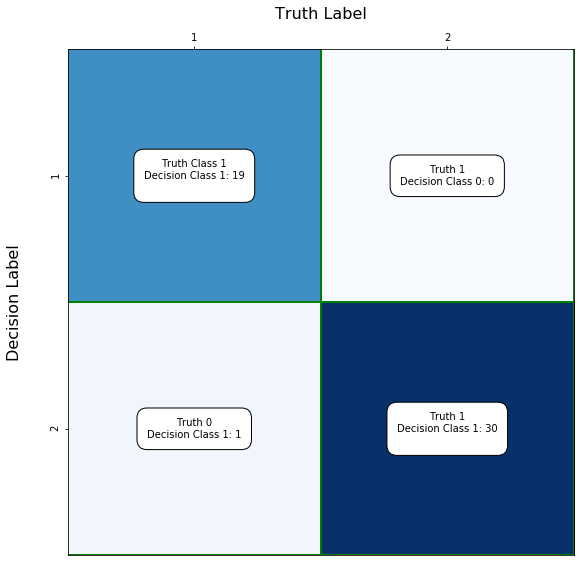

In [5]:
def show_confusion_matrix(C):

    class_labels=['1','2']

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(1.5,-0.5)

    ax.plot([-0.5,2.5],[0.5,0.5], '-g', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-g', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-g', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-g', lw=2)
    
    
    ax.set_xlabel('Truth Label', fontsize=16)
    ax.set_xticks([0,1])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_coords(0.50,1.06)

    ax.set_ylabel('Decision Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1])
    ax.yaxis.set_label_coords(-0.09,0.50)


    ax.text(0,0,'Truth Class 1\nDecision Class 1: %d\n'%C[0,0],va='center',ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,0, #Due to rotation, 0,1 to 1,0
            'Truth 1\nDecision Class 0: %d'%C[0,1],va='center',ha='center',bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(0,1, #Due to rotation, 1,0 to 0,1
            'Truth 0\nDecision Class 1: %d'%C[1,0],va='center',ha='center',bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,1,'Truth 1\nDecision Class 1: %d\n'%C[1,1],va='center',ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    
    plt.tight_layout()
    plt.show()
show_confusion_matrix(conf_matrix)